# First ML pipeline with AutoML

<!--<badge>--><a href="https://colab.research.google.com/github/kuennethgroup/ml_in_ms_st25/blob/main/02_ex/first_ml_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->

In this tutorial, we'll use the `pandas` Python library to import a polymer dataset containing information on the tendency to crystalize for 432 polymers. After plotting the histogram of the dataset, we  use the `FLAML` Python library to train a machine learning model. Finally, we analyze the data using a parity plot.

#### AutoML with FLAML (A Fast Library for Automated Machine Learning & Tuning)

FLAML automates the training of machine learning models. It automatically finds high quality machine learning models for you by iterating through many machine learning model types and hyperparameters. 





In [ ]:
# on Colab
# !pip install flaml[automl]

### Analyze data


1. Use pandas to read the file `https://raw.githubusercontent.com/kuennethgroup/ml_in_ms_wt24/refs/heads/main/data/polymers_tend_to_crystalize.json` into a pandas DataFrame with the name `df`.

2. Plot a histogram showing the frequencies of property value. Use 40 bins.


,smiles,property,value,fingerprint
0,[*]C[*],Xc,47.80,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,[*]CC([*])C,Xc,44.47,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,[*]CC([*])CC,Xc,34.04,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,[*]CC([*])CCC,Xc,20.01,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,[*]CC([*])CC(C)C,Xc,21.64,"[0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...
427,[*]C([*])(F)F,Xc,31.84,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
428,[*]C/C=C\C[*],Xc,25.58,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
429,[*]O[Si](C)(C)CCCC(=O)Oc1ccc(C=Nc2ccc(N=Cc3ccc...,Xc,29.05,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
430,[*]O[Si](C)(C)CCCC(=O)Oc1ccc(C=Nc2ccc(Cc3ccc(N...,Xc,21.74,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."


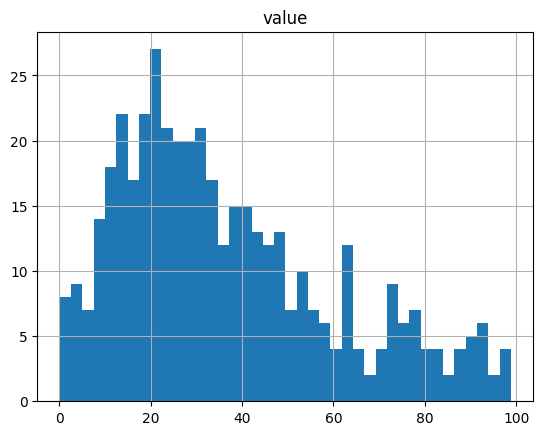

In [2]:
import pandas as pd
import numpy as np

df = pd.read_json(
    "https://raw.githubusercontent.com/kuennethgroup/materials_datasets/refs/heads/main/polymer_tendency_to_crystalize/polymers_tend_to_crystalize.json"
)
df.hist("value", bins=40)
display(df)

In [3]:
from sklearn.model_selection import train_test_split


X_all = pd.DataFrame(np.vstack(df["fingerprint"]))
y_all = df["value"].apply(float)
all_data = pd.concat([X_all, y_all], axis=1)

train_data, test_data = train_test_split(all_data, test_size=0.2, random_state=42)
train_data

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,value
132,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,57.620000
231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,28.370000
31,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21.610000
84,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,79.990000
296,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.370000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,29.770000
106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21.110000
270,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.900000
348,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,12.490000


### AutoML with FLAML


Train a machine learning model using the AutoML capabilities of FLAML. Use the dataset loaded in the previous step for training the model. 

Metric 

$$\text{Mean squared error (MSE)} = \frac{1}{n} \sum_i^n (Y_i - \hat{Y}_i)^2; \quad Y_i = \text{truth}, \hat{Y} = \text{predictions}, n=\text{number of values}$$

In [4]:
# In case flaml is not installed execute
# !pip install -U "flaml[automl]"

from flaml import AutoML

automl = AutoML()


automl_settings = {
    "task": "regression",  # Classification (i.e., yes,no,maybe, etc.) is also possible
    "starting_points": "data",  # Some preselection helper of FLAML
    "metric": "mse",  # Goal is minimize the error (loss function). Measure with mean squared error (MSE).
    "time_budget": 60,
    "max_iter": 100,
}


automl.fit(
    train_data.drop("value", axis=1).values,
    train_data["value"].values,
    **automl_settings,
)

[flaml.automl.logger: 04-30 09:22:04] {1728} INFO - task = regression
[flaml.automl.logger: 04-30 09:22:04] {1739} INFO - Evaluation method: holdout
[flaml.automl.logger: 04-30 09:22:04] {1838} INFO - Minimizing error metric: mse
[flaml.automl.logger: 04-30 09:22:04] {1739} INFO - Evaluation method: holdout
[flaml.automl.logger: 04-30 09:22:04] {1838} INFO - Minimizing error metric: mse
[flaml.automl.logger: 04-30 09:22:04] {105} WARNING - Starting points outside of the search space are removed. Remaining starting points for <class 'flaml.automl.model.LGBMEstimator'>: []
[flaml.automl.logger: 04-30 09:22:04] {105} WARNING - Starting points outside of the search space are removed. Remaining starting points for <class 'flaml.automl.model.RandomForestEstimator'>: []
[flaml.automl.logger: 04-30 09:22:04] {105} WARNING - Starting points outside of the search space are removed. Remaining starting points for <class 'flaml.automl.model.XGBoostSklearnEstimator'>: []
[flaml.automl.logger: 04-30 

In [5]:
# Lower is better
automl.best_loss_per_estimator

{'extra_tree': 152.2203178954693,
 'lgbm': 263.9805682105229,
 'rf': 142.3542339779104,
 'xgboost': 321.1292976833637,
 'xgb_limitdepth': inf,
 'sgd': 186.39221534165333,
 'catboost': 206.51862148575646}

### AutoML with autoGLuon

Train a machine learning model using the AutoML capabilities of autoGluon. Use the dataset loaded in the previous step for training the model. 


In [6]:
from autogluon.tabular import TabularPredictor


predictor = TabularPredictor(label="value").fit(train_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20250430_072252"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.8
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #140-Ubuntu SMP Wed Dec 18 17:59:53 UTC 2024
CPU Count:          192
Memory Avail:       981.50 GB / 1007.45 GB (97.4%)
Disk Space Avail:   712.06 GB / 7096.34 GB (10.0%)
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.8
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #140-Ubuntu SMP Wed Dec 18 17:59:53 UTC 2024
CPU Count:          192
Memory Avail:       981.50 GB / 1007.45 GB (97.4%)
Disk Space Avail:   712.06 GB / 7096.34 GB (10.0%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets 

In [13]:
predictor.evaluate(test_data)

/home/chris/courses/ml-in-ms-st25/.venv/lib/python3.12/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


{'root_mean_squared_error': -18.35388718700578,
 'mean_squared_error': -336.86517487333487,
 'mean_absolute_error': -14.121613214621807,
 'r2': 0.4469857628865196,
 'pearsonr': 0.699714549727586,
 'median_absolute_error': -10.50512771606445}

In [7]:
predictor.leaderboard(test_data)

/home/chris/courses/ml-in-ms-st25/.venv/lib/python3.12/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,NeuralNetTorch,-18.333348,-18.867910,root_mean_squared_error,0.128639,0.120012,6.530697,0.128639,0.120012,6.530697,1,True,10
1,WeightedEnsemble_L2,-18.353887,-18.278863,root_mean_squared_error,0.185270,0.152358,8.847015,0.004291,0.000388,0.010025,2,True,12
2,RandomForestMSE,-18.654515,-19.766317,root_mean_squared_error,0.069195,0.090225,0.658934,0.069195,0.090225,0.658934,1,True,5
3,ExtraTreesMSE,-18.695730,-19.708392,root_mean_squared_error,0.069611,0.053411,0.607935,0.069611,0.053411,0.607935,1,True,7
4,NeuralNetFastAI,-19.290404,-19.736862,root_mean_squared_error,0.030105,0.009614,1.056644,0.030105,0.009614,1.056644,1,True,8
5,XGBoost,-19.531355,-20.054248,root_mean_squared_error,0.051093,0.027726,1.132139,0.051093,0.027726,1.132139,1,True,9
6,LightGBMXT,-19.648474,-18.684754,root_mean_squared_error,0.022236,0.022344,1.249649,0.022236,0.022344,1.249649,1,True,3
7,CatBoost,-19.662561,-19.415103,root_mean_squared_error,0.031564,0.028273,5.198374,0.031564,0.028273,5.198374,1,True,6
8,LightGBM,-20.550314,-19.513685,root_mean_squared_error,0.033739,0.017598,1.427335,0.033739,0.017598,1.427335,1,True,4
9,LightGBMLarge,-20.942873,-20.376421,root_mean_squared_error,0.022632,0.022008,3.805951,0.022632,0.022008,3.805951,1,True,11


### Analyze prediction

Analyze the data using a parity plot of predictions and true values. Add a 45 degree dashed line to the parity plot.


/home/chris/courses/ml-in-ms-st25/.venv/lib/python3.12/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


Text(0.1, 0.8, 'AutoGluon - MSE 336.87')

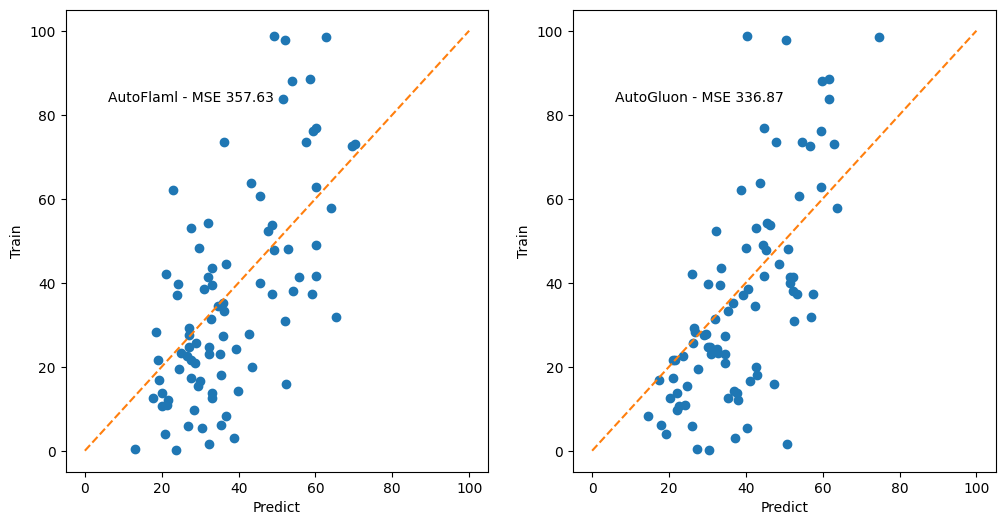

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


# AutoFlaml
y_pred = automl.predict(test_data.drop("value", axis=1).values)

ax1.plot(y_pred, test_data["value"], "o")
ax1.plot([0, 100], [0, 100], "--")
ax1.set_ylabel("Train")
ax1.set_xlabel("Predict")


mse_autoFlaml = mean_squared_error(
    test_data["value"].values,
    y_pred,
)

ax1.text(0.1, 0.8, f"AutoFlaml - MSE {mse_autoFlaml:.2f}", transform=ax1.transAxes)


# AutoGluon

y_pred = predictor.predict(test_data.drop("value", axis=1))
ax2.plot(y_pred, test_data["value"], "o")
ax2.plot([0, 100], [0, 100], "--")
ax2.set_ylabel("Train")
ax2.set_xlabel("Predict")


mse_autoGluon = mean_squared_error(
    test_data["value"].values,
    y_pred,
)

ax2.text(
    0.1,
    0.8,
    f"AutoGluon - MSE {mse_autoGluon:.2f}",
    transform=ax2.transAxes,
)

### Tasks
1. Compare the performance of AutoGluon and AutoFlaml
2. Compare the performance of AutoGluon and AutoFlaml with different time budgets
3. Compare the performance of AutoGluon and AutoFlaml with different max_iter
    
